In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb

import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec

In [2]:
savedir = 'images/tcw/'

In [3]:
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')

import phase_calc_functions as phase_calc
import phase_plot_functions as phase_plot

In [4]:
phase_plot = reload(phase_plot)

Opening the 

In [5]:
# This version of AWAP is just for the north, wet-season and for raindays
tcw_dir = '/g/data/w40/ab2313/tcw/tcw_era5.nc'
tcw = xr.open_dataset(tcw_dir)
tcw

<xarray.Dataset>
Dimensions:  (lat: 53, lon: 178, time: 7250)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-30
  * lon      (lon) float32 112.0 112.25 112.5 112.75 ... 155.75 156.0 156.25
  * lat      (lat) float32 -10.0 -10.25 -10.5 -10.75 ... -22.5 -22.75 -23.0
Data variables:
    tcw      (time, lat, lon) float32 ...

In [6]:
'''ERA 5 Mask'''
directory2 = '/g/data/w40/ab2313/ERA5/'
landsea_mask = xr.open_dataset(directory2 + 'mask_landsea.nc')
landsea_mask = landsea_mask.rename({'longitude':'lon', 'latitude':'lat'})
landsea_mask = landsea_mask.squeeze().drop('time')

tcw = tcw.where(landsea_mask.lsm >= 0.5, drop = True)

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5">  Calculatoin </font></center></div>

In [7]:
tcw

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, time: 7250)
Coordinates:
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-30
Data variables:
    tcw      (time, lat, lon) float32 nan nan nan ... 21.650633 22.054811

In [8]:
phase_calc = reload(phase_calc)

# Splitting into different 1 to 8 phases
tcw_split = phase_calc.split_into_1to8(tcw, phase_calc.load_rmm())

#Making each year only the wet season
tcw_ws = phase_calc.wet_season_year(tcw_split)

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, phase: 9, time: 3640)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-30 1980-10-01 ... 2019-12-30
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    tcw      (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan <xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, phase: 9, time: 3610)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-03-31
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    tcw      (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan


In [9]:
tcw_ws

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, phase: 9, time: 7250)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-30
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    tcw      (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

# 90th Percentile

In [10]:
phase_calc = reload(phase_calc)
percentile_90, trend_90, trend_sig_90, trend_percent_90, trend_percent_sig_90 = phase_calc.return_alltrendinfo(tcw_ws,q = 90)

percentile/mean has been calculated
trend has been calculated
trend has been converted to percent
significant points habe been found
function is complete


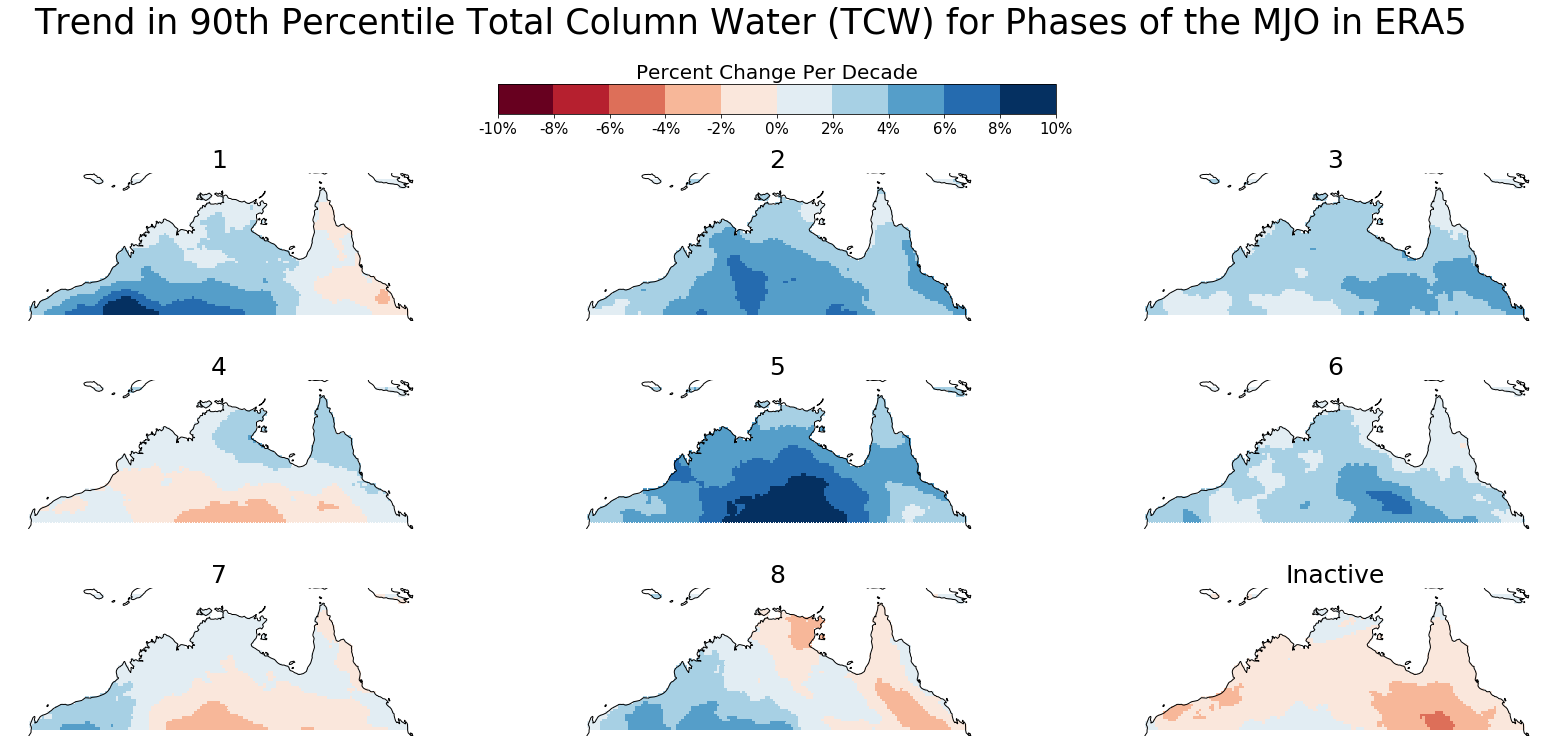

In [16]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_90.trend,
                        titlepiece = '90th Percentile Total Column Water (TCW)', datasource = 'ERA5',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)

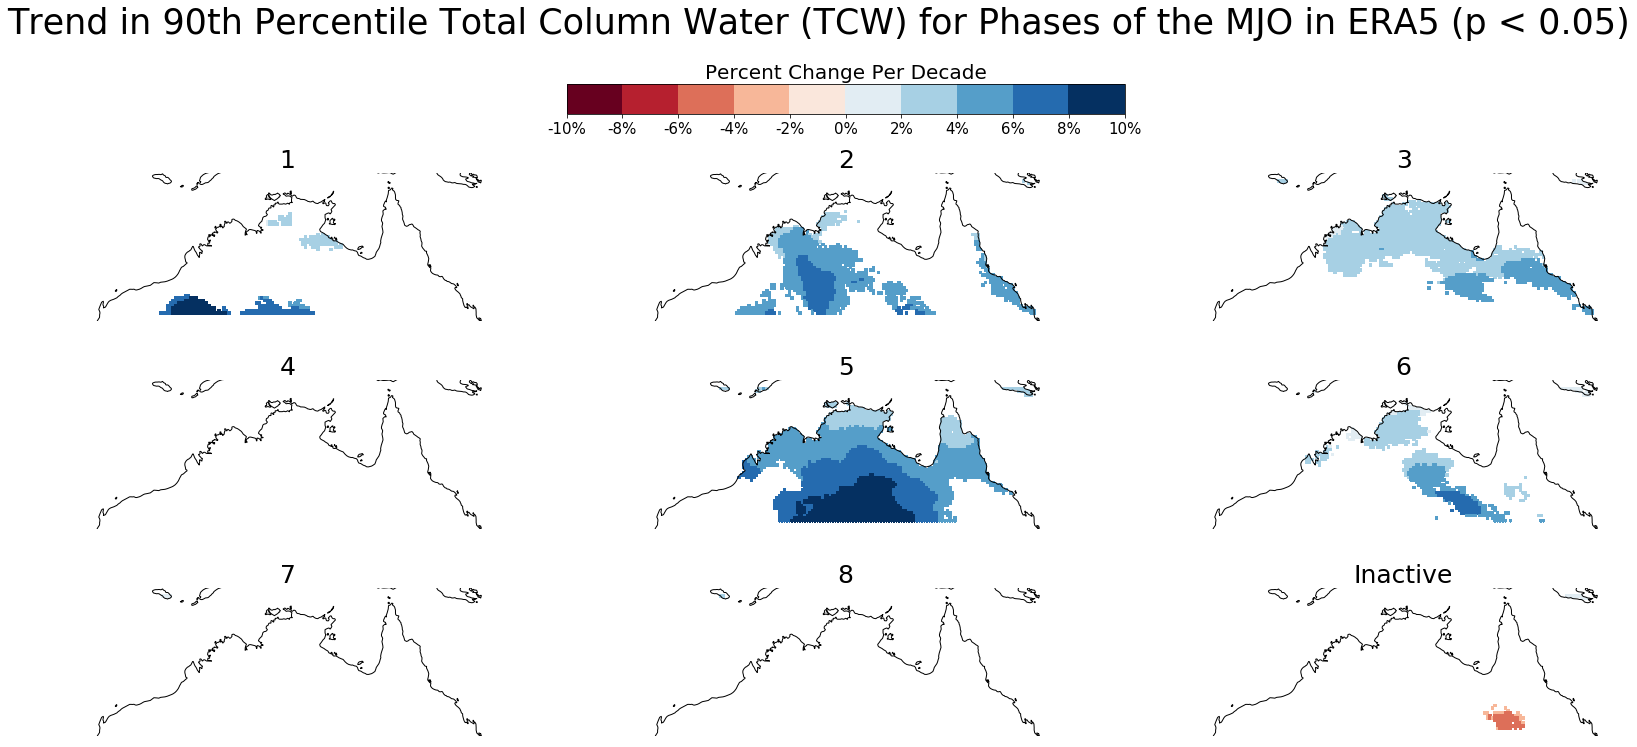

In [17]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_sig_90.trend,
                        titlepiece = '90th Percentile Total Column Water (TCW)', datasource = 'ERA5 (p < 0.05)',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)

# 95th Percentile

In [18]:
phase_calc = reload(phase_calc)
percentile_95, trend_95, trend_sig_95, trend_percent_95, trend_percent_sig_95 = phase_calc.return_alltrendinfo(tcw_ws,q = 95)

percentile/mean has been calculated
trend has been calculated
trend has been converted to percent
significant points habe been found
function is complete


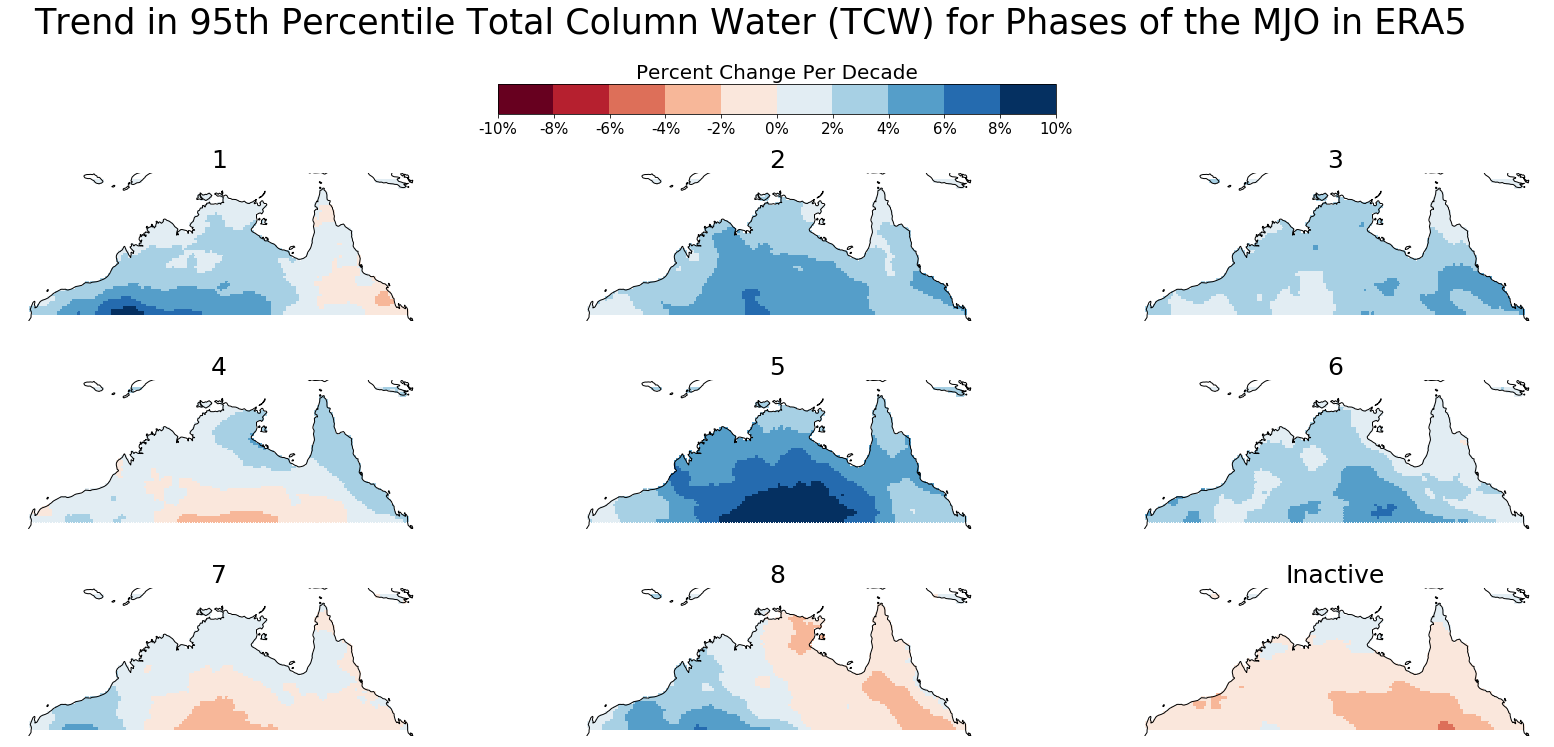

In [19]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_95.trend,
                        titlepiece = '95th Percentile Total Column Water (TCW)', datasource = 'ERA5',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)

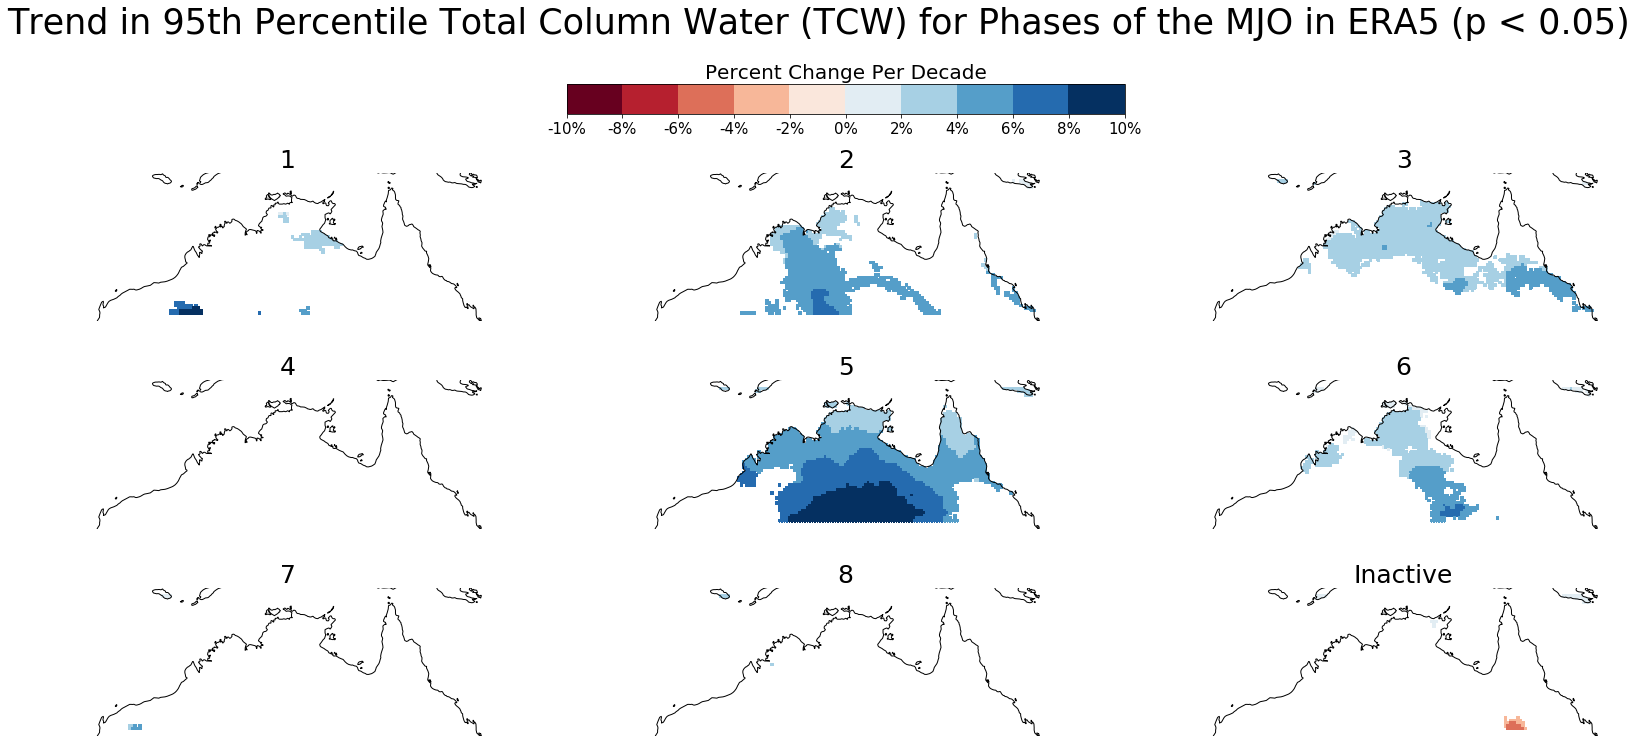

In [20]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_sig_95.trend,
                        titlepiece = '95th Percentile Total Column Water (TCW)', datasource = 'ERA5 (p < 0.05)',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)

# Mean

In [21]:
phase_calc = reload(phase_calc)
percentile_mean, trend_mean, trend_sig_mean, trend_percent_mean, trend_percent_sig_mean = phase_calc.return_alltrendinfo(tcw_ws,q = 'mean')

percentile/mean has been calculated
trend has been calculated
trend has been converted to percent
significant points habe been found
function is complete


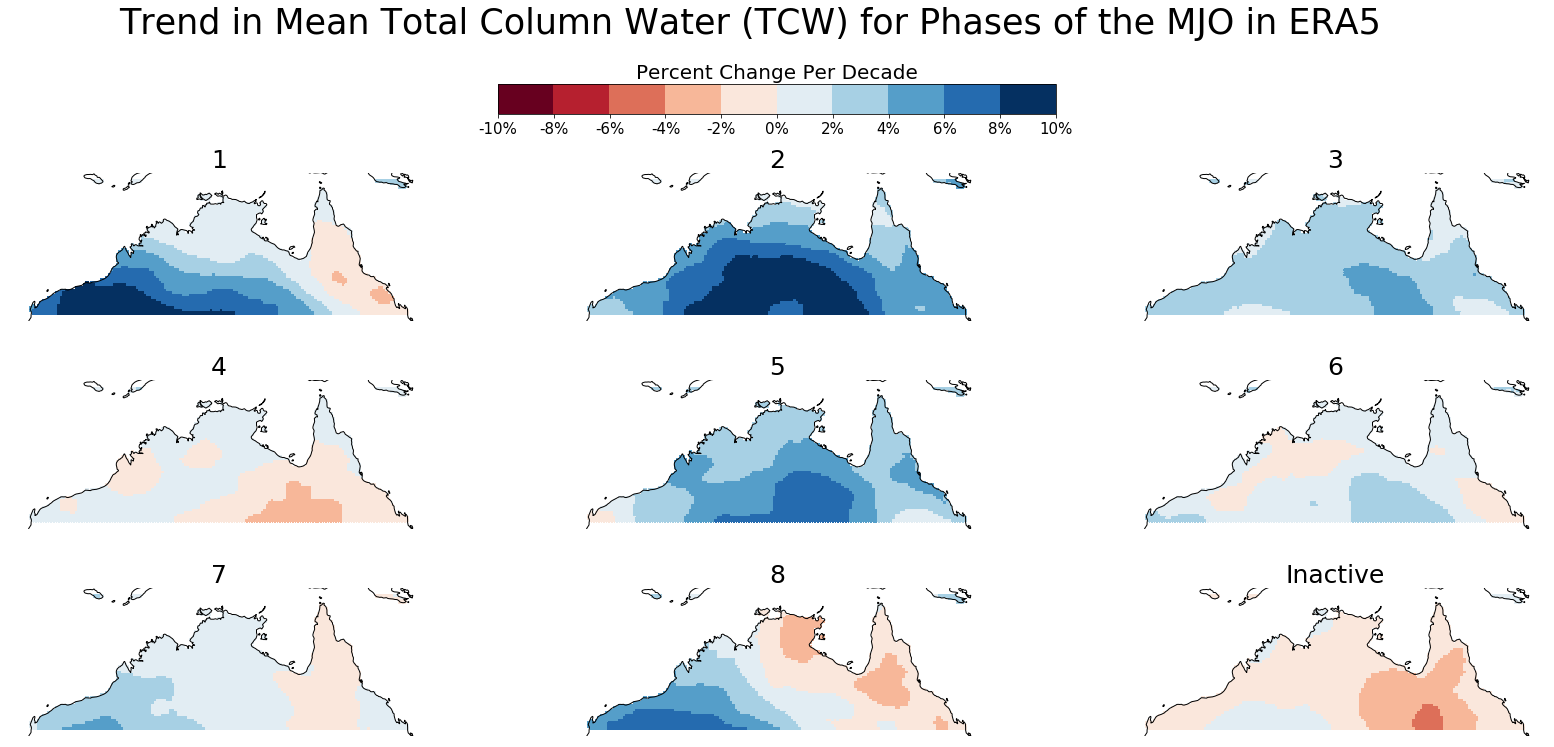

In [22]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_mean.trend,
                        titlepiece = 'Mean Total Column Water (TCW)', datasource = 'ERA5',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)

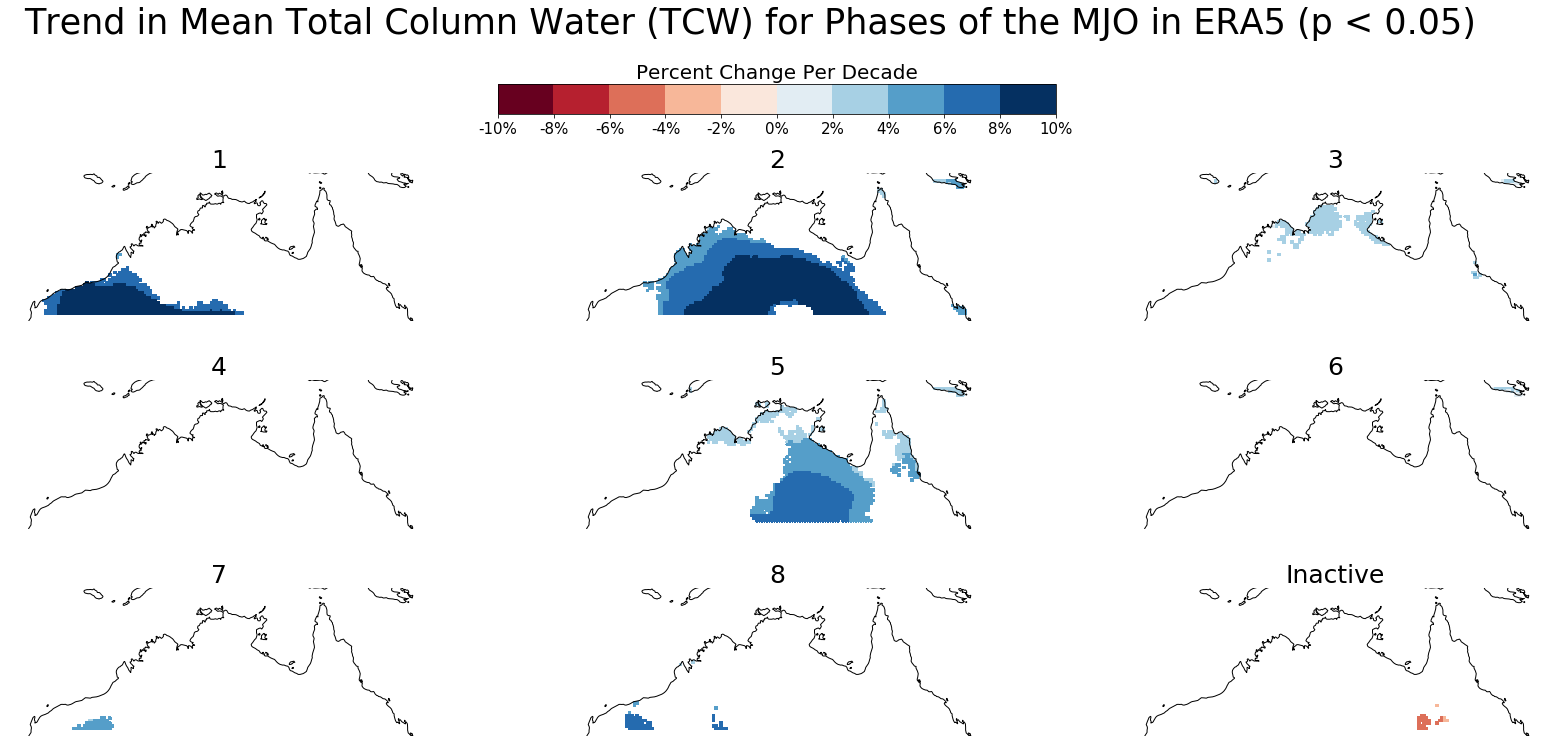

In [23]:
phase_plot = reload(phase_plot)
phase_plot.trend_plots(trend_percent_sig_mean.trend,
                        titlepiece = 'Mean Total Column Water (TCW)', datasource = 'ERA5 (p < 0.05)',
                       colorbar_title = 'Percent Change Per Decade', 
                        vmax = 10 , savefig = 1, savedir = savedir)